In [1]:
install.packages('runjags')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library('rjags')
library('runjags')

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


In [3]:
dat = read.csv(file="callers.csv", header=TRUE)
## set R's working directory to the same directory
## as this file, or use the full path to the file.

In [4]:
summary(dat)

     calls         days_active       isgroup2           age       
 Min.   :0.0000   Min.   :21.00   Min.   :0.0000   Min.   :19.00  
 1st Qu.:0.0000   1st Qu.:36.00   1st Qu.:0.0000   1st Qu.:26.00  
 Median :0.0000   Median :52.00   Median :0.0000   Median :30.00  
 Mean   :0.8393   Mean   :53.61   Mean   :0.1071   Mean   :30.11  
 3rd Qu.:1.0000   3rd Qu.:70.00   3rd Qu.:0.0000   3rd Qu.:33.00  
 Max.   :8.0000   Max.   :90.00   Max.   :1.0000   Max.   :43.00  

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 224
   Unobserved stochastic nodes: 3
   Total graph size: 1220

Initializing model



Potential scale reduction factors:

     Point est. Upper C.I.
b[1]       1.03       1.11
b[2]       1.00       1.00
b0         1.03       1.12

Multivariate psrf

1.03

,b[1],b[2],b0
Lag 0,1.0000000,1.000000000,1.0000000
Lag 1,0.9765674,0.496569866,0.9756057
Lag 5,0.8983471,0.045368665,0.8975781
Lag 10,0.8085060,0.001707832,0.8096800
Lag 50,0.3487293,-0.002196771,0.3533976


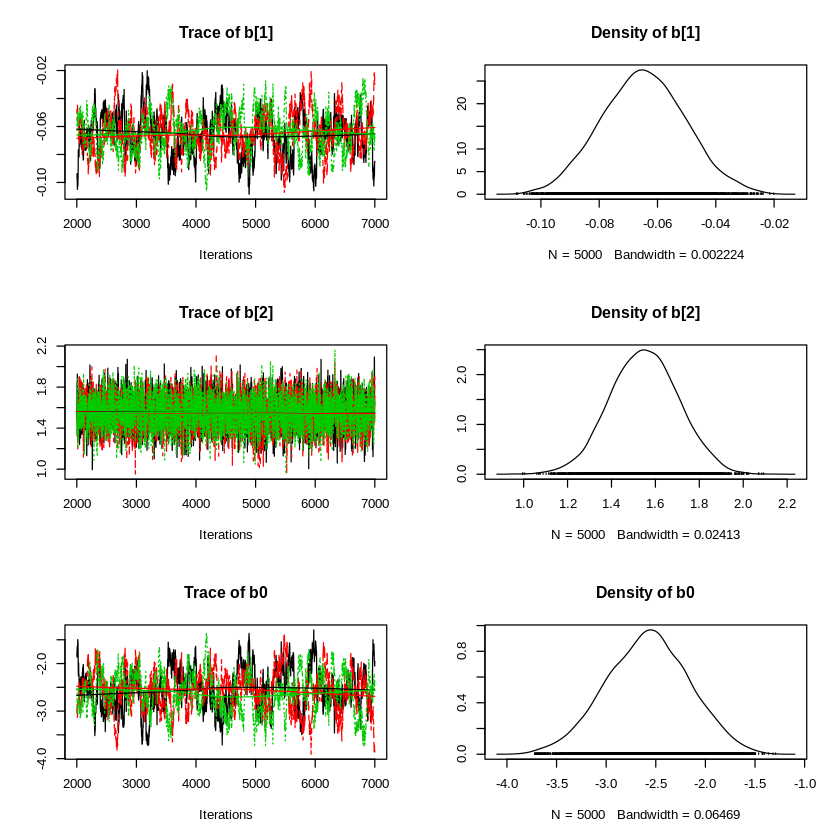

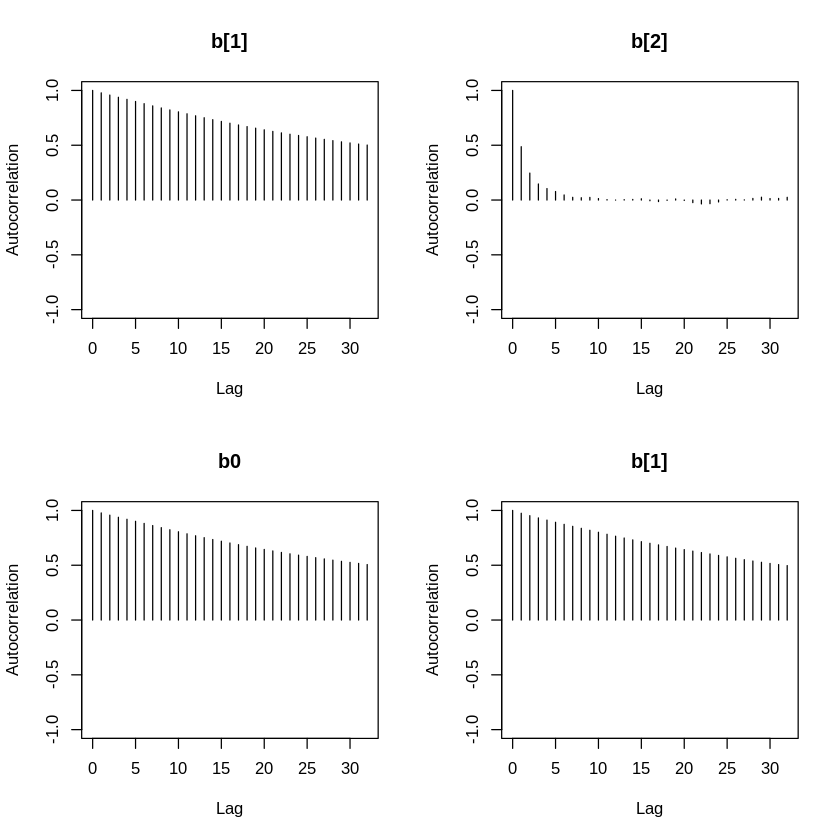

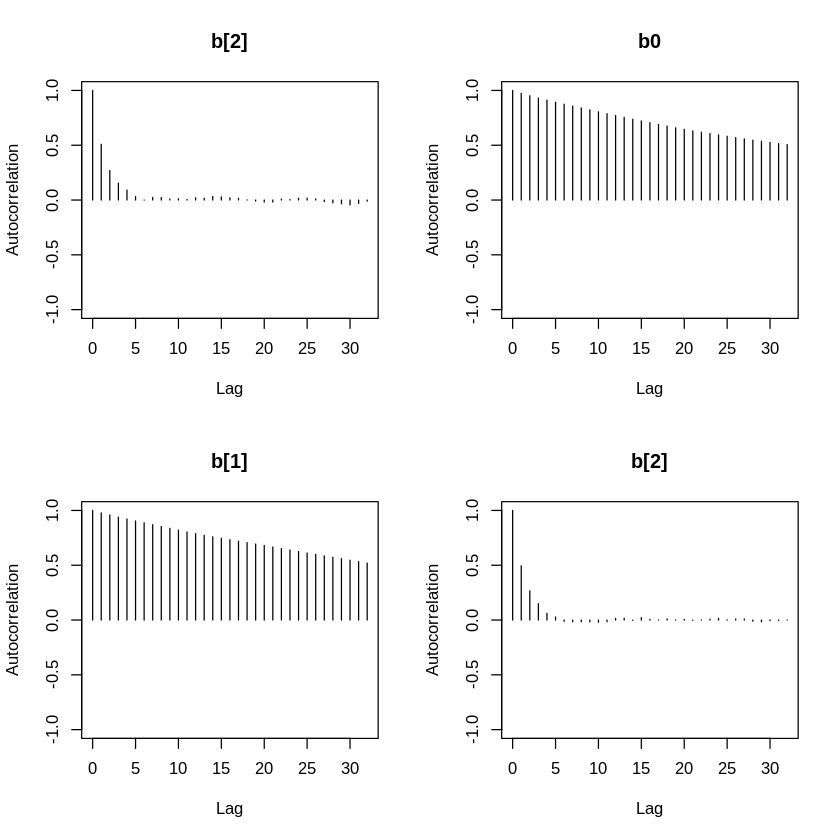

b[1]      b[2]        b0 
 157.8954 4768.2747  155.0874

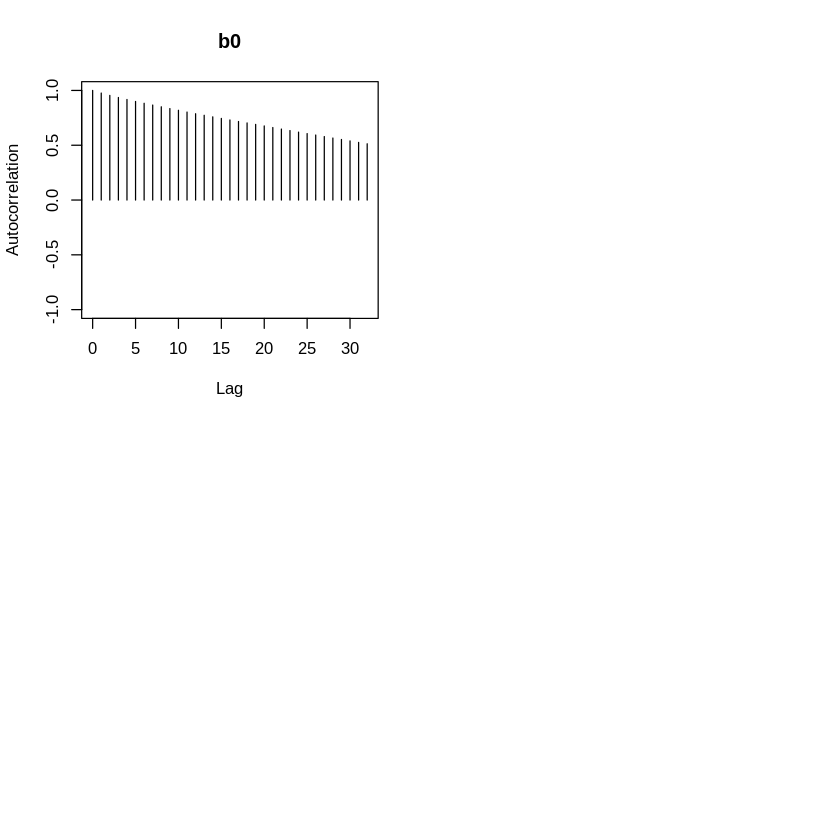

In [11]:
mod_call_string = " model {
    for (i in 1:length(calls)) {
        calls[i] ~ dpois(days_active[i] * lam[i])
        log(lam[i]) = b0 + b[1]*age[i] + b[2]*isgroup2[i]
    }

    b0 ~ dnorm(0.0, 1.0/10.0^2)
    for (i in 1:2) {
        b[i] ~ dnorm(0.0, 1.0/10.0^2)
    }
} "

set.seed(102)

params = c("b0", "b")

mod_call = jags.model(textConnection(mod_call_string), data=dat, n.chains=3)
update(mod_call, 1e3)

mod_call_sim = coda.samples(model=mod_call,
                           variable.names=params,
                           n.iter=5e3)
mod_call_csim = as.mcmc(do.call(rbind, mod_call_sim))

## convergence diagnostics
plot(mod_call_sim)

gelman.diag(mod_call_sim)
autocorr.diag(mod_call_sim)
autocorr.plot(mod_call_sim)
effectiveSize(mod_call_sim)


In [12]:
loglam = as.matrix(mod_call_csim) %*% c(29.0, 1.0, 1.0)
lam = exp(loglam)
mean(3<= rpois(length(lam), lam * 30.0))

[1] 0.2276

In [7]:
?rpois

In [8]:
length(lam)

[1] 30000